<p style="font-size: 20px; color: orange;">📄 Project Purpose</p>

This project was developed for a competition held at IIT (BHU) Varanasi, where participants were tasked with presenting innovative solutions to real-life problems.

We designed a smart water bottle that helps people quickly check the quality of drinking water, especially in public places like parks, taps, and restaurants. The bottle uses sensors to measure key water parameters and a machine learning model to instantly assess whether the water is safe to drink.

Our goal was to provide a portable, easy-to-use solution to help individuals make safer drinking choices on the go.


<p style="font-size: 20px; color: orange;">📄 Dataset Used</p>

For this project, we used the water_potability.csv dataset, which contains water quality metrics for 3,276 different water samples collected from various water bodies. The dataset provides detailed measurements of key chemical and physical properties that directly affect water safety.
        
<p style="font-size: 20px; color: orange;">📘 Project Guide</p>

1. Data Overview
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Selection
6. Model Training
7. Model Evaluation
8. Summary

<p style="font-size: 16px; color: red; text-align: right;">Author name: Ayush</p>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')


In [2]:
file_path = "D:\\Data_Science\\Projects\\WaterQualityCheck\\Dataset\\water_potability.csv"

df = pd.read_csv(file_path)
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Data Overview Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

In [3]:
print(df.shape)

(3276, 10)


In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [7]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Data Preprocessing Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

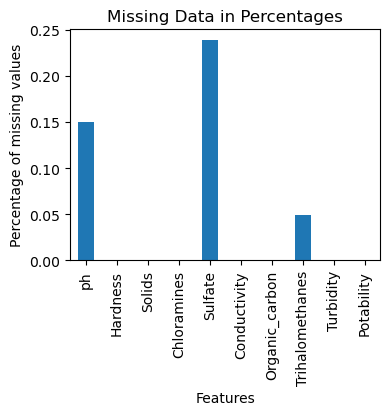

In [8]:
# Checking For NULL values
df.isnull().mean().plot.bar(figsize=(4,3))
plt.ylabel('Percentage of missing values')
plt.xlabel('Features')
plt.title('Missing Data in Percentages');

In [9]:
for col in ['ph', 'Trihalomethanes', 'Sulfate']:
    df[col] = df[col].fillna(df[col].mean())

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Exploratory Data Analysis (EDA) Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

<Axes: >

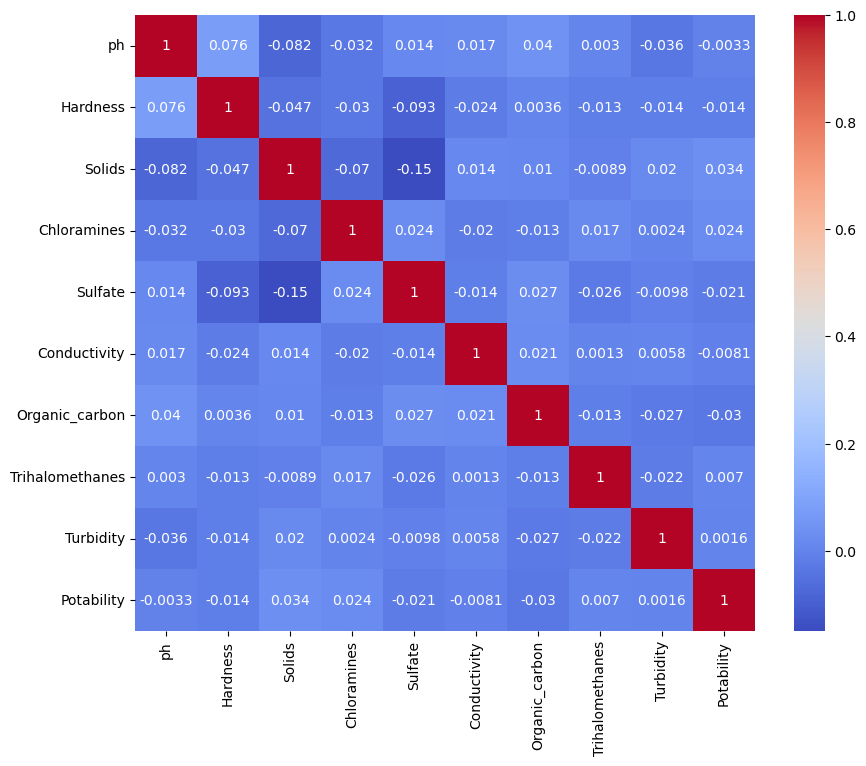

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

# I will use a Violin Plot here because the data has two subgroups based on water potability (0: Not Potable, 1: Potable), and violin plots are 
# excellent for visualizing the distribution and density of features across these categories.


# Here you can see Rectangle showing the ends of the first and third quartiles and central dot the median

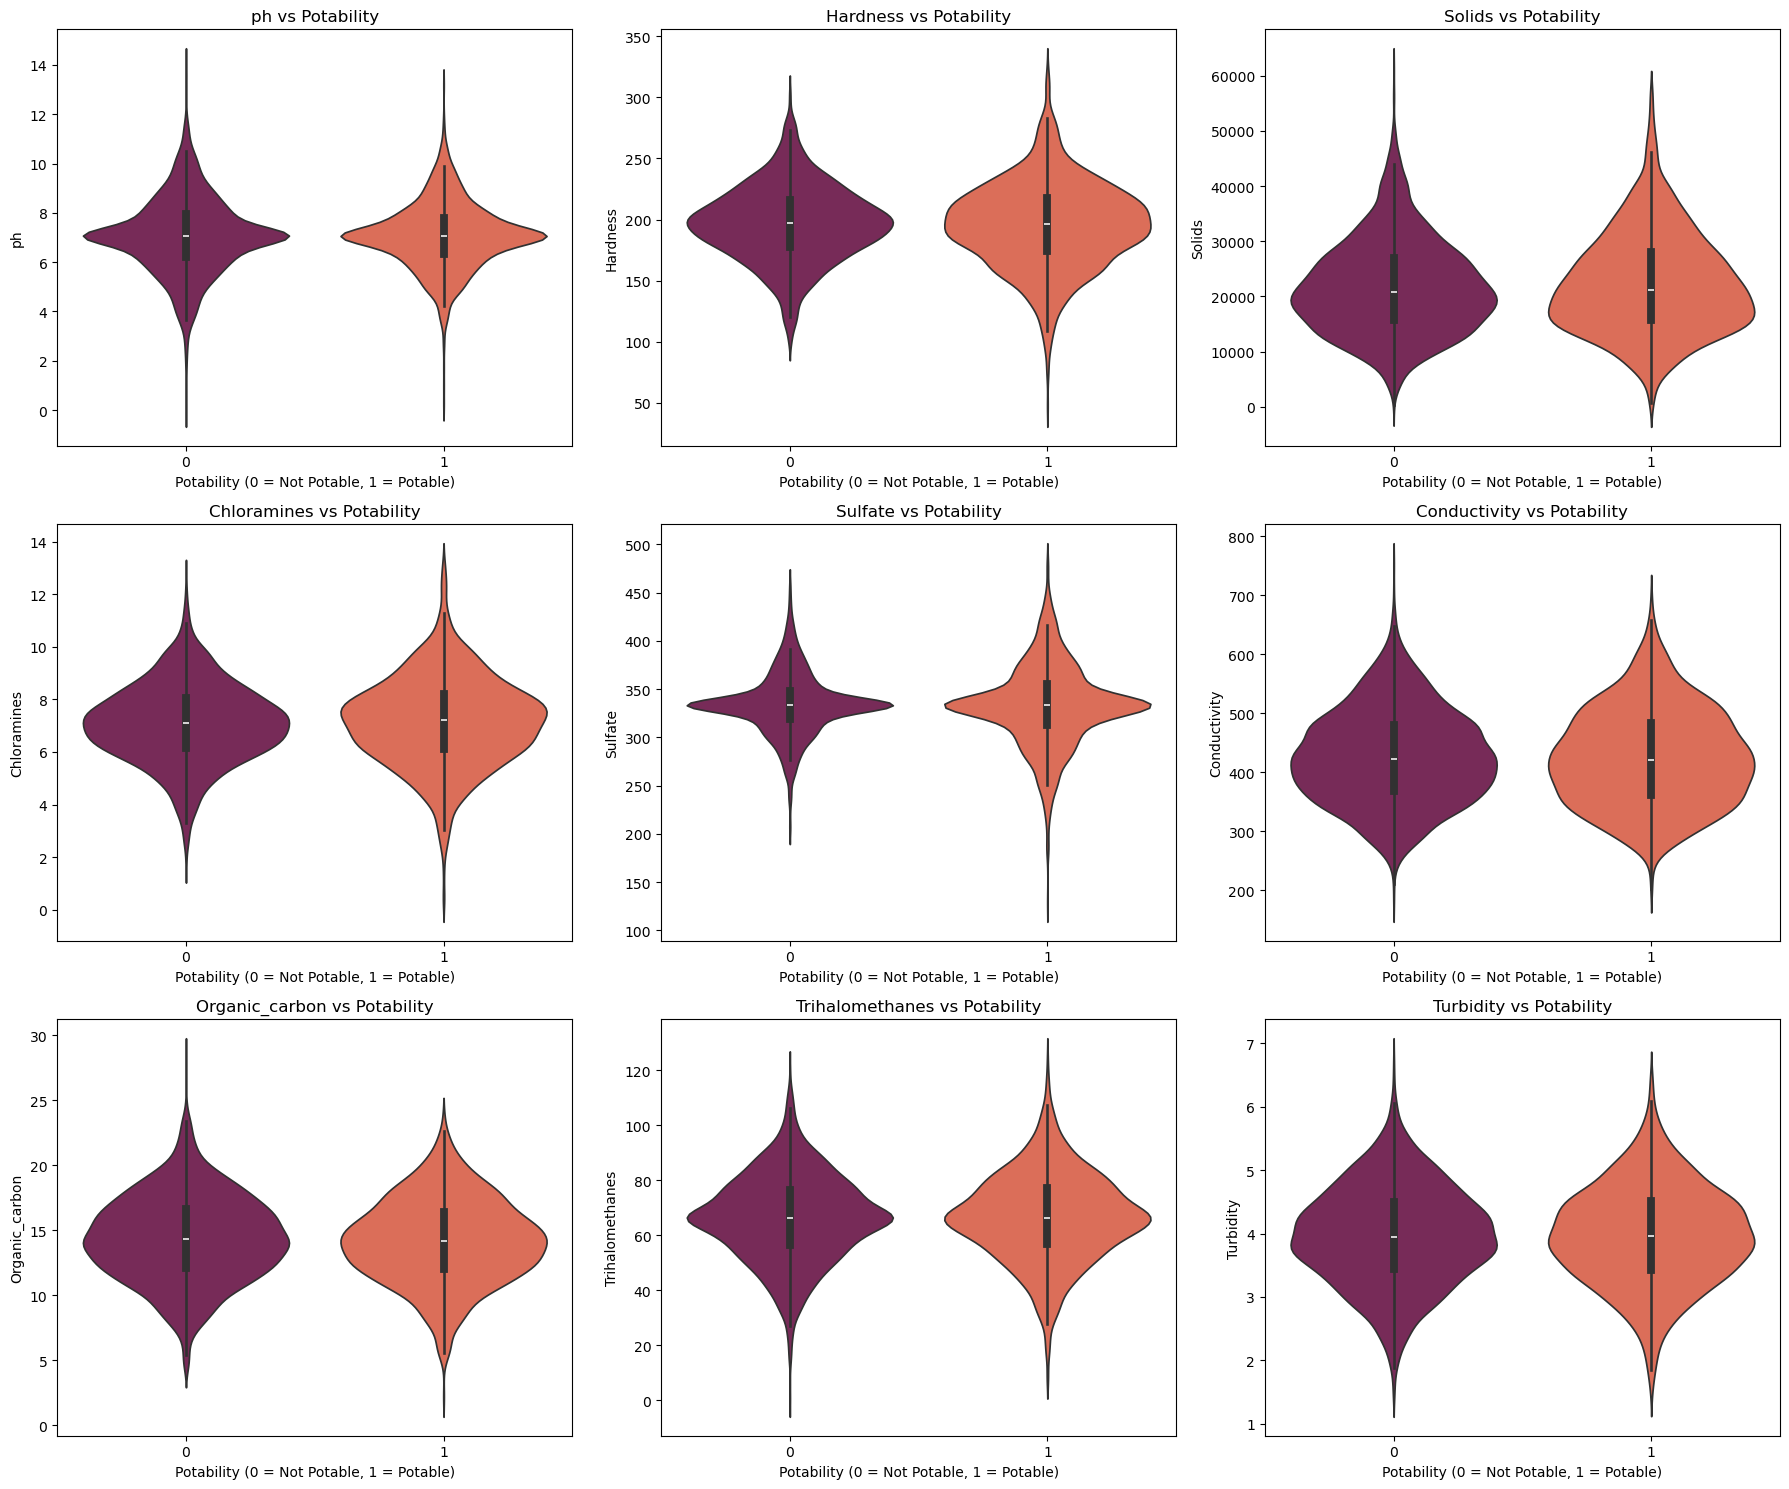

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 
            'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 15))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(x='Potability', y=feature, data=df, palette='rocket', ax=axes[i])
    axes[i].set_title(f'{feature} vs Potability', fontsize=12)
    axes[i].set_xlabel('Potability (0 = Not Potable, 1 = Potable)')
    axes[i].set_ylabel(feature)


plt.tight_layout()
plt.show()


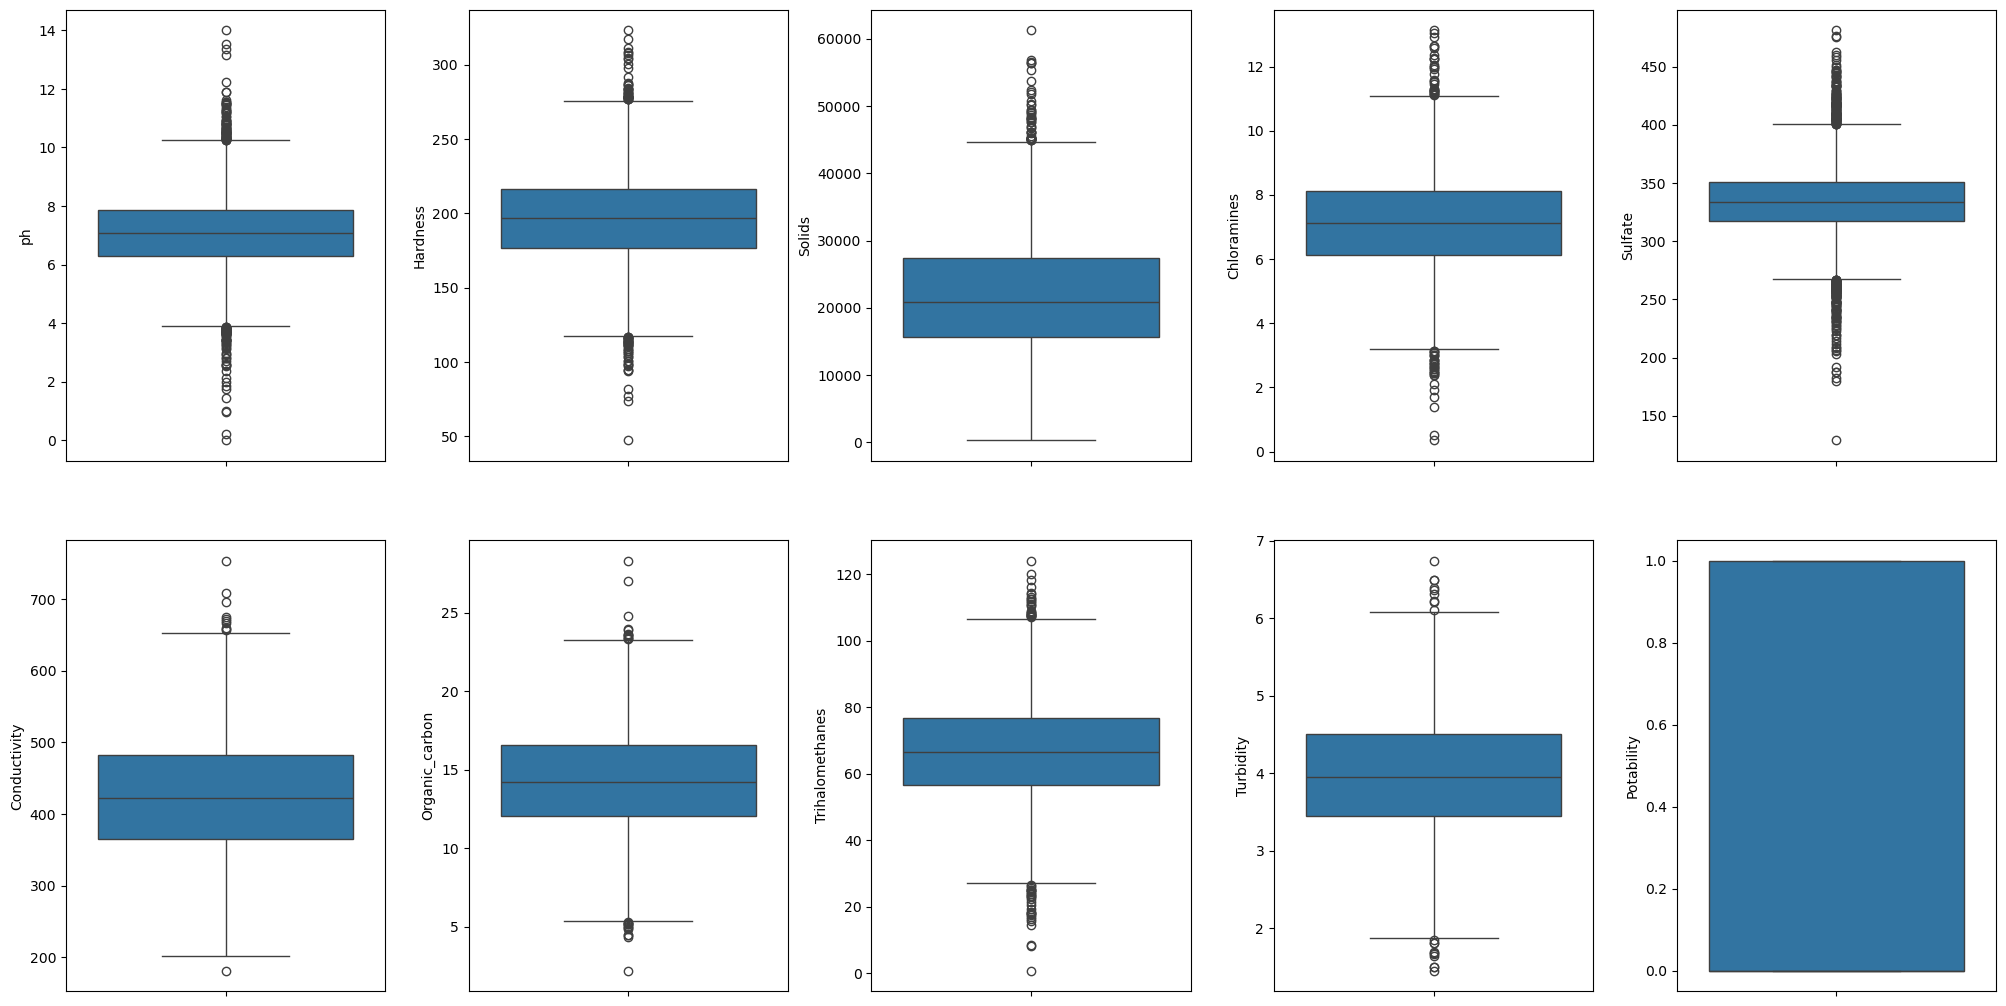

In [13]:
# Visualizing dataset and also checking for outliers

fig, ax = plt.subplots(ncols = 5, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad=5.0)

In [14]:
# Outliers are identified and stored; however, their cumulative influence on water quality is not straightforward to determine.

import pandas as pd

before_check = pd.DataFrame(columns=['Lower Bound', 'Upper Bound'])

for col in df.select_dtypes(include=['float64', 'int64']).columns:

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    before_check.loc[col] = [lower_bound, upper_bound]

print(before_check)


                 Lower Bound   Upper Bound
ph                  3.889107     10.258615
Hardness          117.125160    276.392834
Solids          -1832.417449  44831.869873
Chloramines         3.146221     11.096086
Sulfate           267.157960    400.322434
Conductivity      191.647579    655.879140
Organic_carbon      5.328026     23.295427
Trihalomethanes    26.619225    106.695040
Turbidity           1.848797      6.091233
Potability         -1.500000      2.500000


<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Feature Engineering Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

🔍 Key Findings Based on EDA
1. No Fixed Limits for Potability:
The data visualization indicates that there are no strict upper or lower thresholds that definitively classify water as potable or non-potable.   However, we will store the observed upper and lower bounds as a safety reference for future checks.

2. Sensor and Cost Limitations:
Due to hardware and cost constraints, we focused on factors like Solids, pH, and Turbidity for the final product. Measuring other parameters was  not feasible within the targeted product pricing, as the sensors for those were significantly more expensive.

3. Contradictions in pH-Based Potability:
The visual analysis revealed that water samples with pH levels as high as 10 appeared in both potable and non-potable categories. This contradicts WHO guidelines, which generally consider such pH levels unsafe for drinking. For better model accuracy, this real-world consideration will be incorporated into the product's safety logic, but not used in the model's training and testing datasets.

In [15]:
#KEEPING Only 3 main factors - ph , turbidity and solids.

In [16]:

# features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
#           'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

features = ['Turbidity', 'Solids','ph']
df.head()  # Display first few rows



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: >

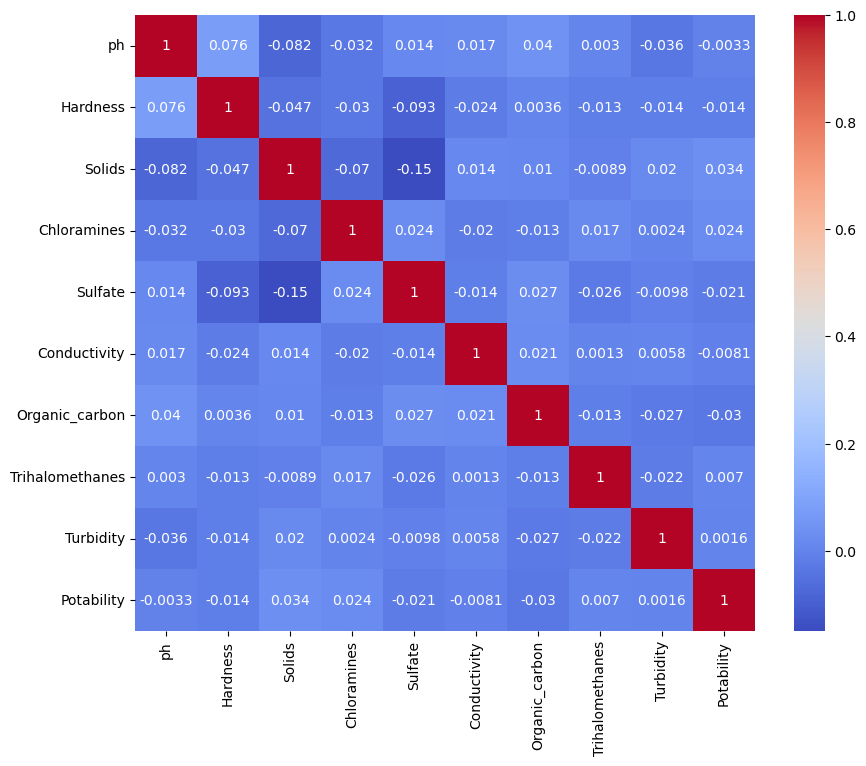

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Model Selection Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

1. Outliers have not been removed in this step because eliminating a data point as an outlier could potentially discard a valid exception case. 
2. To address this, we will first train supervised models like Random Forest.
3. Then i will use model like XGBoost


In [18]:

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Potability'], train_size = 0.75, random_state = 42)


In [19]:
print(f'train samples: {len(X_train)} validation samples: {len(X_test)}')
print(f'target proportion: {sum(y_train)/len(y_train):.4f}')

train samples: 2457 validation samples: 819
target proportion: 0.3944


<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Model Training Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

The workflow consists of two pipelines: one for training the model and another for testing its performance.

<p style="font-size: 15px;text-align: center;">PIPELINE 1</p>

In [20]:
X_train.shape, y_train.shape

((2457, 3), (2457,))

In [21]:
#first we will do for Random Forest 

In [22]:
min_samples_split_list = [2, 8, 32, 128, 256, 512, 1024, 2048]
max_depth_list = [2, 4, 8, 16, 32, 64]
n_estimators_list = [10,50,100,500,1000]

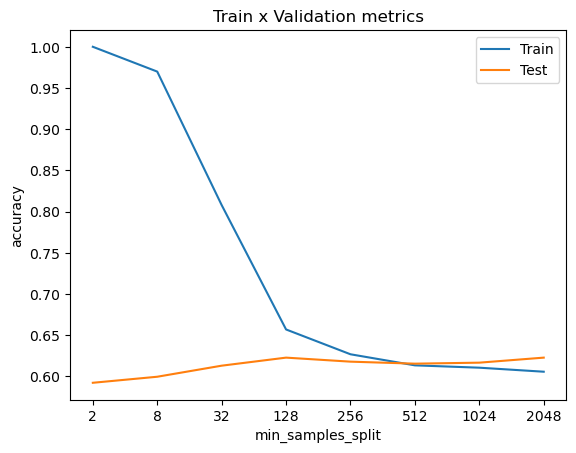

In [23]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

MIN SAMPLE SPLIT : 128

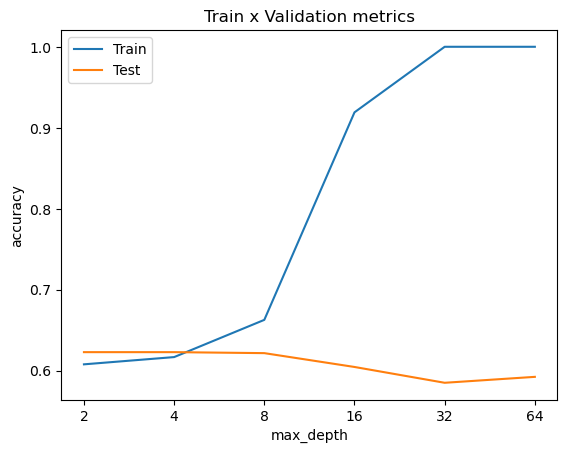

In [24]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

MAX_DEPTH: 14

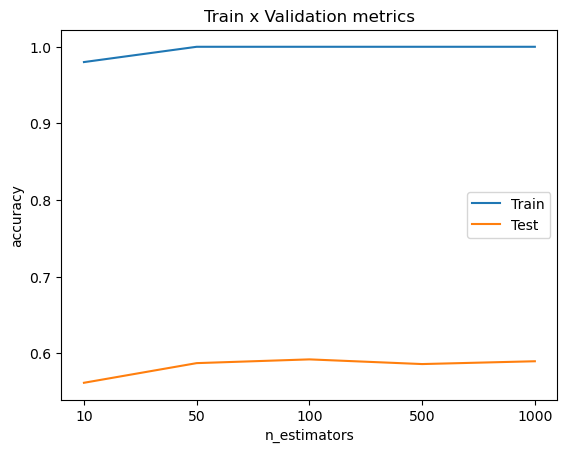

In [25]:
accuracy_list_train = []
accuracy_list_test = []

for n_estimators in n_estimators_list:
    
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test) 
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])

N_ESTIMATORS: 100

<p style="font-size: 15px;text-align: center;">PIPELINE 2</p>

In [26]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 14, 
                                             min_samples_split = 128).fit(X_train,y_train)

In [27]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.6418
Metrics test:
	Accuracy score: 0.6190


In [28]:
cm_train = confusion_matrix(y_train, random_forest_model.predict(X_train))
print("Confusion Matrix - Train:")
print(cm_train)

# Confusion Matrix for Test
cm_test = confusion_matrix(y_test,random_forest_model.predict(X_test))
print("Confusion Matrix - Test:")
print(cm_test)

Confusion Matrix - Train:
[[1468   20]
 [ 860  109]]
Confusion Matrix - Test:
[[492  18]
 [294  15]]


In [29]:
from sklearn.metrics import precision_score, recall_score

print(f"\nTrain Precision (sklearn): {precision_score(y_train, random_forest_model.predict(X_train)):.4f}")
print(f"Train Recall (sklearn): {recall_score(y_train, random_forest_model.predict(X_train)):.4f}")

print(f"\nTest Precision (sklearn): {precision_score(y_test, random_forest_model.predict(X_test)):.4f}")
print(f"Test Recall (sklearn): {recall_score(y_test, random_forest_model.predict(X_test)):.4f}")



Train Precision (sklearn): 0.8450
Train Recall (sklearn): 0.1125

Test Precision (sklearn): 0.4545
Test Recall (sklearn): 0.0485


<p style="font-size: 25px ;color: red; text-align: center;">Now we will be applying XGBoost</p>

In [30]:
help(XGBClassifier())

Help on XGBClassifier in module xgboost.sklearn object:

class XGBClassifier(sklearn.base.ClassifierMixin, XGBModel)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |
 |  Parameters
 |  ----------
 |
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |
 |      max_depth :  typing.Optional[int]
 |
 |          Maximum tree depth for base learners.
 |
 |      max_leaves : typing.Optional[int]
 |
 |          Maximum number of leaves; 0 indicates no limit.
 |
 |      max_bin : typing.Optional[int]
 |
 |          If using histogram-based algorithm, maximum number of bins per feature
 |
 |      grow_policy : typing.Optional[str]
 |
 |          Tree growing policy.
 |
 |          - depthwise: Fav

In [31]:
n = int(len(X_train)*0.75) ## Let's use 75% to train and 25% to eval

In [32]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [33]:
# now the problem was that data is imbalanced as the data we took was imbalanced

print(y_train_fit.value_counts())
print(y_train_eval.value_counts())

neg_train, pos_train = np.bincount(y_train)
scale_pos_weight = neg_train/pos_train

print(scale_pos_weight)

Potability
0    1123
1     719
Name: count, dtype: int64
Potability
0    365
1    250
Name: count, dtype: int64
1.5356037151702786


In [34]:
xgb_model = XGBClassifier(
    n_estimators = 500, 
    learning_rate = 0.01,
    verbosity = 3, 
    random_state = 42,
    scale_pos_weight=scale_pos_weight,
    early_stopping_rounds=30, 
    eval_metric = 'logloss'
)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

[03:47:50] ======== Monitor (0): HostSketchContainer ========
[03:47:50] AllReduce: 0.00018s, 1 calls @ 180us

[03:47:50] MakeCuts: 0.000223s, 1 calls @ 223us

[03:47:50] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1842, 3, 5526).
[03:47:51] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (615, 3, 1845).
[03:47:51] DEBUG: C:\actions-runner\_work\xgboost\xgboost\src\gbm\gbtree.cc:131: Using tree method: 0
[0]	validation_0-logloss:0.69150
[1]	validation_0-logloss:0.69140
[2]	validation_0-logloss:0.69124
[3]	validation_0-logloss:0.69107
[4]	validation_0-logloss:0.69092
[5]	validation_0-logloss:0.69082
[6]	validation_0-logloss:0.69069
[7]	validation_0-logloss:0.69058
[8]	validation_0-logloss:0.69048
[9]	validation_0-logloss:0.69039
[10]	validation_0-logloss:0.69030
[11]	validation_0-logloss:0.69023
[12]	validation_0-logloss:0.69016

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, ...)

<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Model Evaluation ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

In [35]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

[03:47:51] DEBUG: C:\actions-runner\_work\xgboost\xgboost\src\gbm\gbtree.cc:131: Using tree method: 0
Metrics train:
	Accuracy score: 0.6024
Metrics test:
	Accuracy score: 0.5311


In [36]:
cm_train = confusion_matrix(y_train, xgb_model.predict(X_train))
print("Confusion Matrix - Train:")
print(cm_train)

# Confusion Matrix for Test
cm_test = confusion_matrix(y_test,xgb_model.predict(X_test))
print("Confusion Matrix - Test:")
print(cm_test)

Confusion Matrix - Train:
[[844 644]
 [333 636]]
Confusion Matrix - Test:
[[264 246]
 [138 171]]


In [37]:
from sklearn.metrics import precision_score, recall_score

print(f"\nTrain Precision (sklearn): {precision_score(y_train, xgb_model.predict(X_train)):.4f}")
print(f"Train Recall (sklearn): {recall_score(y_train, xgb_model.predict(X_train)):.4f}")

print(f"\nTest Precision (sklearn): {precision_score(y_test, xgb_model.predict(X_test)):.4f}")
print(f"Test Recall (sklearn): {recall_score(y_test, xgb_model.predict(X_test)):.4f}")



Train Precision (sklearn): 0.4969
Train Recall (sklearn): 0.6563

Test Precision (sklearn): 0.4101
Test Recall (sklearn): 0.5534


<hr style="border: 2px solid red; margin: 0;">
<p style="font-size: 20px; color: orange; text-align: center;">Summary Below ⬇️</p>
<hr style="border: 2px solid red; margin: 0;">

Based on the results, the Random Forest model demonstrates significantly better performance compared to XGBoost with the selected features. Given the current feature set, Random Forest appears to be a more reliable choice for further evaluation and analysis.
<p style="color:red; font-weight:bold;">
    I also attempted applying algorithms like Grid Search for hyperparameter tuning, but unfortunately, it did not lead to any significant improvement in accuracy or other evaluation metrics.
</p>
